In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from skimage.util.shape import view_as_windows
from interpolate import linear_interpolate
from skimage.transform import rescale
from error_algorithms import IoU

In [4]:
img_path = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728/convolutions/synth_00000_pmc_0.0728.tif"
mask_path = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.0728/masks/synth_00000_pmc_0.0728.tif"
small_path = "C:/Users/robho/OneDrive/Desktop/Uni_Work/Year_4/project2/superres/third_trial/omnipose_training/test/pmc_0.3276/masks/synth_00000_pmc_0.3276.tif"

In [5]:
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
mask = cv.imread(mask_path, cv.IMREAD_GRAYSCALE)
small_mask = cv.imread(small_path, cv.IMREAD_GRAYSCALE)

In [6]:
shapearr =  (np.array([[1,2/3,4/9,1/3,2/9]],dtype=np.float64) * np.array([[207],[54]])).astype(int).T

In [7]:
shapes = []
for shape in shapearr:
    shapes.append(list(shape))

In [25]:
lr_mask = linear_interpolate(mask,shapes[-1],)
ulr_mask = linear_interpolate(lr_mask,shapes[0],)

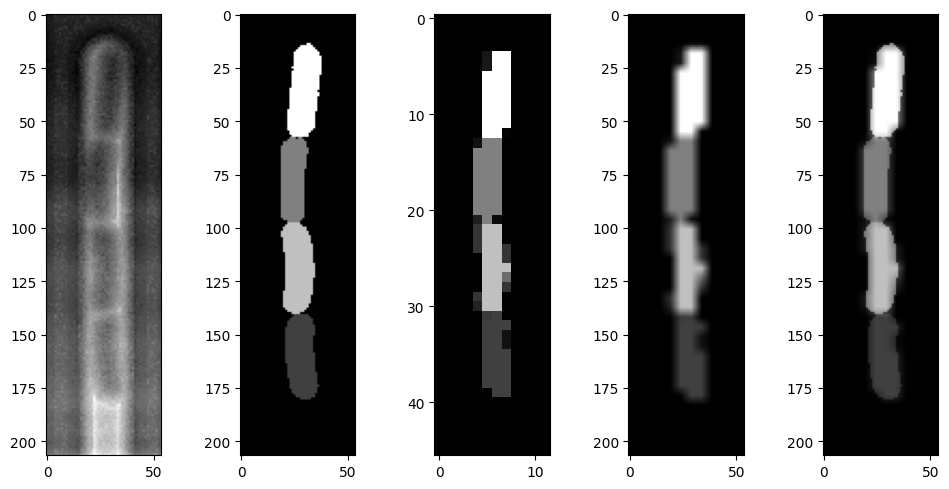

In [26]:
fig,axs = plt.subplots(1,5,figsize=[10,5])
axs[0].imshow(img,"gray")
axs[1].imshow(mask,"gray")
axs[2].imshow(lr_mask,"gray")
axs[3].imshow(ulr_mask,"gray")
axs[4].imshow(ulr_mask+mask,"gray")
fig.tight_layout()
plt.show()

In [10]:
outlist = []
exclist = []
unq_list = []
counts_list = []
for shape in shapes:
    hr = mask
    lr = linear_interpolate(hr,shape,"nearest")
    unq, counts = np.unique(lr,return_counts=True)
    unq_list.append(unq)
    counts_list.append(counts)
    ulr = linear_interpolate(lr,shapes[0],"nearest")
    out, exc = IoU(hr,ulr)
    outlist.append(out)
    exclist.append(exc)

iou_list = []
other = []
for out in outlist:
    vals = []
    top = 0
    bot = 0
    for a,b in out:
        vals.append(a/b)
        top += a
        bot += b
    iou_list.append(np.mean(vals))
    other.append(vals)

# for out in outlist:
#     for a,b in out:
#         perclist.append(a/b)
# percarr = np.array(perclist)

# for exc in exclist:
#     excessout.extend(exc)
# excessarr = np.array(excessout)

# iou_list

In [11]:
iou_list, other

([1.0,
  0.9358469878085314,
  0.8769615272006459,
  0.8729685994191227,
  0.7755756391921359],
 [[1.0, 1.0, 1.0, 1.0],
  [0.943289224952741,
   0.9515418502202643,
   0.9117147707979627,
   0.9368421052631579],
  [0.8832391713747646,
   0.8315098468271335,
   0.8994800693240901,
   0.8936170212765957],
  [0.8930581613508443,
   0.852760736196319,
   0.8835125448028673,
   0.8625429553264605],
  [0.7923211169284468, 0.7367491166077739, 0.75, 0.8232323232323232]])

In [12]:
outlist

[array([[502, 502],
        [438, 438],
        [538, 538],
        [538, 538]]),
 array([[499, 529],
        [432, 454],
        [537, 589],
        [534, 570]]),
 array([[469, 531],
        [380, 457],
        [519, 577],
        [504, 564]]),
 array([[476, 533],
        [417, 489],
        [493, 558],
        [502, 582]]),
 array([[454, 573],
        [417, 566],
        [417, 556],
        [489, 594]])]

In [13]:
unq_list

[array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3., 4.]),
 array([0., 1., 2., 3., 4.])]

In [14]:
counts_list

[array([9162,  502,  438,  538,  538], dtype=int64),
 array([4075,  222,  188,  245,  238], dtype=int64),
 array([1832,   95,   75,  105,  101], dtype=int64),
 array([1019,   55,   52,   57,   59], dtype=int64),
 array([462,  23,  24,  19,  24], dtype=int64)]

In [15]:
scales = [1,2/3,4/9,1/3,2/9]

In [16]:
for i,counts in enumerate(counts_list):
    print(np.sum(counts)/np.sum(counts_list[0]),scales[i]**2)

1.0 1
0.4444444444444444 0.4444444444444444
0.19753086419753085 0.19753086419753085
0.1111111111111111 0.1111111111111111
0.04938271604938271 0.04938271604938271


In [17]:
print((counts_list[0]*(2/3)**2).astype(int))
print((counts_list[0]*(4/9)**2).astype(int))
print((counts_list[0]*(1/3)**2).astype(int))
print((counts_list[0]*(2/9)**2).astype(int))

[4072  223  194  239  239]
[1809   99   86  106  106]
[1018   55   48   59   59]
[452  24  21  26  26]


In [18]:
for i,shape in enumerate(shapes):
    hr = mask
    lr = linear_interpolate(hr,shape,"nearest")
    ulr = linear_interpolate(lr,shapes[0],"nearest")
    mse = np.sum((hr - ulr).astype(bool)**2)/hr.size
    print(mse, 0.055/scales[i])


0.0 0.055
0.011987833243871891 0.0825
0.022365360529611737 0.12375000000000001
0.023528359277151547 0.165
0.044999105385578816 0.24750000000000003


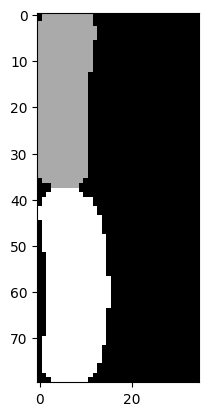

In [19]:
plt.imshow(mask[60:140,19:],"gray")
plt.show()

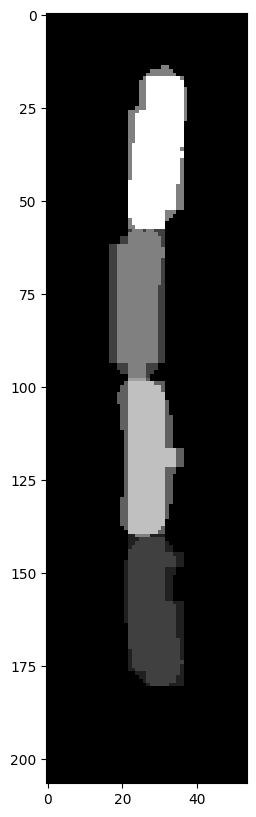

In [20]:
fig,axs = plt.subplots(1,1,figsize=[5,10])
axs.imshow(ulr_mask + mask, "gray")
plt.show()

In [21]:
edge = np.array([[0,0,0,0,0,0,0,0,1],
                 [0,0,0,0,0,0,0,1,1],
                 [0,0,0,0,0,0,1,1,1],
                 [0,0,0,0,0,1,1,1,1],
                 [0,0,0,0,1,1,1,1,1],
                 [0,0,0,1,1,1,1,1,1],
                 [0,0,1,1,1,1,1,1,1],
                 [0,1,1,1,1,1,1,1,1],
                 [1,1,1,1,1,1,1,1,1]])
linear_interpolate(linear_interpolate(edge,[3,3],"nearest"),[9,9],"nearest")

array([[0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [22]:
# perimeter function is easy, just take labelled mask and label value as input, do label[label == value] = 1 else 0, calculate perimiter using skimage func